# here i try to read out the keept labview tracking data

based on code Santiago gave me a while ago

In [5]:
import numpy as np
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation

import fnmatch
import os

from IPython.display import clear_output

from nptdms import TdmsFile # this library contains the actual TDMS loading parts
#from ipywidgets import interact

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
wdir = '.' # set the open file dialog directory to the notebook directory
def openFileDialog(wdir):
    from PyQt5.QtWidgets import QApplication,QFileDialog
    app = QApplication([dir])
    files = QFileDialog.getOpenFileNames(None, "Select Files...", wdir, filter="All Files (*)")
    return files[0]

def loadTDMS(file):
    global exposure, dimx, dimy
    tdms_file = TdmsFile(file)
    p=tdms_file.object().properties   
    dimx=int(p['dimx'])  
    dimy=int(p['dimy'])
    
    frames=int(p['dimz'])
    exposure=float(p['exposure'])
    images=tdms_file.channel_data('Image','Image')
    #print('frames',frames)
    #print('dimx',dimx)
    #print('dimx_2',int(np.sqrt(len(images)/frames)))
    if dimx ==1:
        dimx = int(np.sqrt(len(images)/frames))
        dimy = dimx
    
    return images.reshape(frames,dimx,dimy)

In [ ]:
######### ohter binsizes dont work yet!!!!
from copy import deepcopy
all_files = openFileDialog(wdir)
files = []
for file in all_files: # make the relevant file list
    if fnmatch.fnmatch(file,'*_movie.tdms'):
        files.append(file)
for file_number in range(len(files)):
    file = files[file_number]
    print(file)
    images = np.zeros(0)
    if fnmatch.fnmatch(file,'*_movie.tdms'):
        images = loadTDMS(file)
        #wdir=os.path.dirname(files[0])  # set the open file dialog directory to the working directory
        ffmpegWriter = animation.writers['ffmpeg']
        writer = ffmpegWriter(fps=1./exposure) # + ".mp4"
        fig = plt.figure(figsize=(5, 5), dpi=100)
        fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
        
        #images = np.log(images) #for a log scale
        im = plt.imshow(images[0], cmap='gray') # vmax=...  ,vmin = 100,vmax = 200
        plt.axis('off')
        #plt.colorbar() # does not look good...
        #break
        with writer.saving(fig, file + ".mp4",dpi = 100):
            for i in range(images.shape[0]):
                im.set_data(images[i])
                writer.grab_frame()
                if (i % 10 == 0):
                    clear_output(wait=True)
                    print('Progress1: File ',int(file_number)+1,' of ',int(len(files)))
                    print('Progress2:', int(i/images.shape[0]*100), '%')

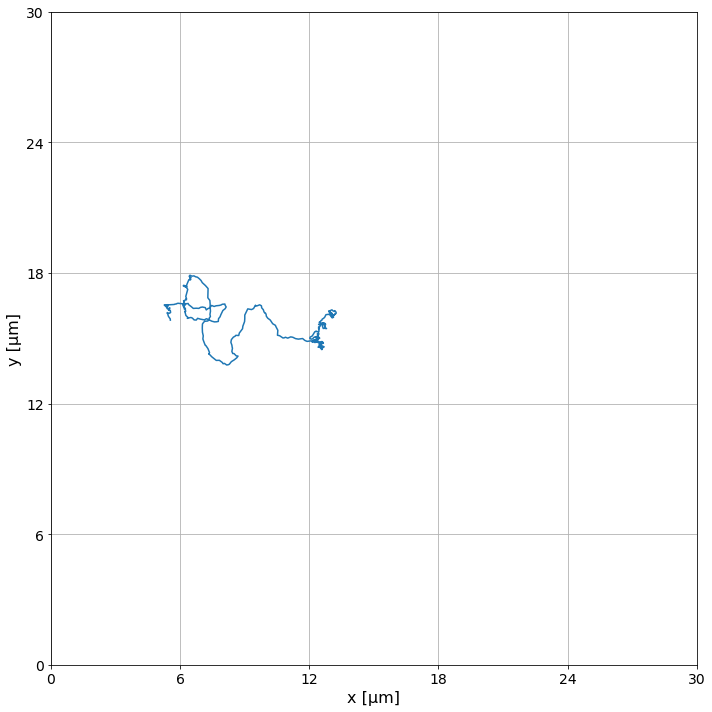

In [96]:
######### ohter binsizes dont work yet!!!!
from copy import deepcopy
all_files = openFileDialog(wdir)
files = []
for file in all_files: # make the relevant file list
    #if fnmatch.fnmatch(file,'*_movie.tdms'):
    if True:
        files.append(file)
for file_number in range(len(files)):
    file = files[file_number]
    print(file)
    #if fnmatch.fnmatch(file,'*_movie.tdms'):
    if True:
        #images = loadTDMS(file)
        k =1
        tdms_file = TdmsFile(file)
        print('checkpoint theta')
        temp = 'cx'+ str(k)
        temp2 = 'cy'+ str(k)
        temp3 = 'action' + str(k)
        vars()[temp] = []
        vars()[temp2] =[]
        vars()[temp3] =[]
        #try:
        #    tdms_file = TdmsFile('C:/Users/Phobos/Documents/Santiago/Medidas/RL/04052017/Python/1_5mili_'+str(k)+'_TH.tdms')
        #except:
        #    pass
        file_info =tdms_file.object()

        a = file_info.properties
 
        xcoord = tdms_file.channel_data('PN','Xc')
        ycoord = tdms_file.channel_data('PN','Yc')
        action = tdms_file.channel_data('PN','Xh')
        x1 = tdms_file.channel_data('PN','Xh')
        y1 = tdms_file.channel_data('PN','Yh')
        PN1 = tdms_file.channel_data('PN','N')
        print(type(x1))
        top = xcoord.shape[0]

        for i in range(top):
            if(xcoord[i] !=0 and ycoord[i] !=0):
                vars()[temp].append(xcoord[i]*0.05647)
                vars()[temp2].append(ycoord[i]*0.05647)
                vars()[temp3].append(action[i])
        np.savetxt('cx'+'.txt',vars()[temp],delimiter=',')
        np.savetxt('cy'+'.txt',vars()[temp2],delimiter=',')
        np.savetxt('action'+'.txt',vars()[temp3],delimiter=',')
        print('checkpoint simga')

x = np.loadtxt('cx'+'.txt')
y = np.loadtxt('cy'+'.txt')
a = np.loadtxt('action'+'.txt')

    

coX = np.loadtxt('cx'+'.txt')
coY = np.loadtxt('cy'+'.txt')
plt.plot(coX,coY)
plt.xticks(range(0,31,6))
plt.yticks(range(0,31,6))
plt.ylim([0,30])
plt.xlim([0,30])
plt.xlabel('x [µm]', fontsize=16)
plt.ylabel('y [µm]',fontsize=16)
plt.tick_params(labelsize=14)
plt.rc('figure',  figsize=(4, 4))
fig=plt.figure(1, figsize = (20,5) )
ax=fig.gca()
ax.grid()
plt.tight_layout()


        

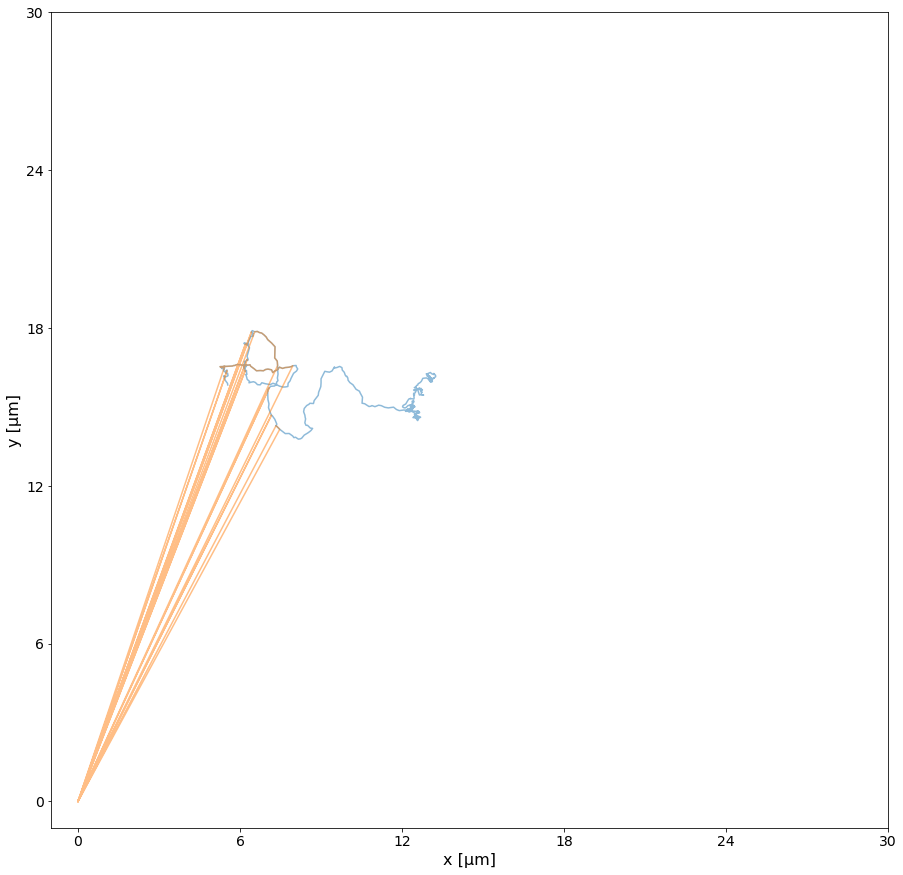

In [95]:
plt.figure(figsize=(15,15))
plt.plot(coX,coY,alpha = 0.5)
plt.plot(x1*0.05647,y1*0.05647,alpha = 0.5)
plt.xticks(range(0,31,6))
plt.yticks(range(0,31,6))
plt.ylim([-1,30])
plt.xlim([-1,30])
plt.xlabel('x [µm]', fontsize=16)
plt.ylabel('y [µm]',fontsize=16)
plt.tick_params(labelsize=14)
plt.rc('figure',  figsize=(10, 10))

#plt.tight_layout()

        

In [86]:
x1

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   97.69444444,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         96.10569106,   96.26694915,   95.46724891,   94.12173913,
         93.19130435,   94.9137931 ,   99.46521739,  101.28699552,
        102.21276596,  102.83817427,  103.6419214 ,  104.52      ,
        105.56306306,  108.05150215,  108.86206897,  109.23181818,
        111.75115207,  112.83333333,  113.25728155,  115.47089947,
        117.10810811,  119.54404145,  121.65517241,  123.        ,
        124.57377049,  126.97894737,  127.75806452,  129.09497207,
        130.63783784,  132.15384615,  133.18131868,  134.22222

In [50]:
images=tdms_file.channel_data?

In [ ]:
images=tdms_file.channel_data

In [67]:
tdms_file.objects

OrderedDict([('/', <TdmsObject with path />),
             ("/'PN'", <TdmsObject with path /'PN'>),
             ("/'PN'/'Xc'", <TdmsObject with path /'PN'/'Xc'>),
             ("/'PN'/'Yc'", <TdmsObject with path /'PN'/'Yc'>),
             ("/'PN'/'Xh'", <TdmsObject with path /'PN'/'Xh'>),
             ("/'PN'/'Yh'", <TdmsObject with path /'PN'/'Yh'>),
             ("/'PN'/'N'", <TdmsObject with path /'PN'/'N'>)])

In [54]:
tdms_file.object('group_name')

KeyError: "Invalid object path: /'group_name'"

In [ ]:

import numpy as np
import cv2
import os
import os.path

numfiles=[]
for i in range(1,50):
    path = 'C:/Users/Phobos/Documents/Santiago/Medidas/RL/04052017/PeDependence/1_5mili/'+str(i)
    num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
    numfiles.append(num_files)

v =[]
for k in range(1,10):
    n = numfiles[k]
    for i in range(n):
        p = 'C:/Users/Phobos/Documents/Santiago/Medidas/RL/04052017/PeDependence/1_5mili/'+str(k)+'/m'+str(k)+'Grid'+str(i)+'.png'
       # print (p)
        img =cv2.imread(p)
        #img = cv2.imread('C:/Users/Phobos/Documents/Santiago/Medidas/RL/04052017/PeDependence/1_5mili/'+str(k)+'/m'+str(k)+'Grid'+str(i)+'.png')
        #height, width,layers = img.shape
        v.append(img)
        
    video = cv2.VideoWriter('C:/Users/Phobos/Documents/Santiago/Medidas/RL/04052017/PeDependence/1_5mili/'+str(k)+'/m'+str(k)+'Grid.avi',cv2.VideoWriter_fourcc(*'MJPG'),33,(512,512))
                         
    for i in range(n):   
        video.write(v[i])
    cv2.destroyAllWindows()
    video.release()

####################################################################
#####################################################################


for k in range (108,158,1): 
    temp = 'cx'+ str(k)
    temp2 = 'cy'+ str(k)
    temp3 = 'action' + str(k)
    vars()[temp] = []
    vars()[temp2] =[]
    vars()[temp3] =[]
    try:
        tdms_file = TdmsFile('C:/Users/Phobos/Documents/Santiago/Medidas/RL/04052017/Python/1_5mili_'+str(k)+'_TH.tdms')
    except:
        pass
    file_info =tdms_file.object()

    a = file_info.properties
    xcoord = tdms_file.channel_data('LN','xc')
    ycoord = tdms_file.channel_data('LN','yc')
    action = tdms_file.channel_data('LN','action')

    top = xcoord.shape[0]

    for i in range(top):
        if(xcoord[i] !=0 and ycoord[i] !=0):
            vars()[temp].append(xcoord[i]*0.05647)
            vars()[temp2].append(ycoord[i]*0.05647)
            vars()[temp3].append(action[i])
    np.savetxt('cx'+str(k-108)+'1_5mili.txt',vars()[temp],delimiter=',')
    np.savetxt('cy'+str(k-108)+'1_5mili.txt',vars()[temp2],delimiter=',')
    np.savetxt('action'+str(k-108)+'1_5mili.txt',vars()[temp3],delimiter=',')

c = 0
for i in range(49):
    x = np.loadtxt('cx'+ str(i)+'1_5mili.txt')
    y = np.loadtxt('cy'+ str(i)+'1_5mili.txt')
    a = np.loadtxt('action'+ str(i)+'1_5mili.txt')
    if(len(x)== len(y) == len(a)):
        c = c+1
print(c)    

for i in range (49): 
    coX = np.loadtxt('cx'+ str(i)+'1_5mili.txt')
    coY = np.loadtxt('cy'+ str(i)+'1_5mili.txt')
    plt.plot(coX,coY)
    plt.xticks(range(0,31,6))
    plt.yticks(range(0,31,6))
    plt.ylim([0,30])
    plt.xlim([0,30])
    plt.xlabel('x [µm]', fontsize=16)
    plt.ylabel('y [µm]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.rc('figure',  figsize=(4, 4))
    
    fig=plt.figure(1, figsize = (20,5) )
    ax=fig.gca()
    ax.grid()
    
    plt.tight_layout()
##########################################################
###########################################################





In [1]:
vars?

In [4]:
TdmsFile?